<a href="https://colab.research.google.com/github/VicenteMercado/ADA-Informes/blob/main/Informe7_CuttingRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de optimización.

**Entrada**: Largo de varilla $n$, vector de precios por cada medida $i=1..n$

**Salida**:  Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

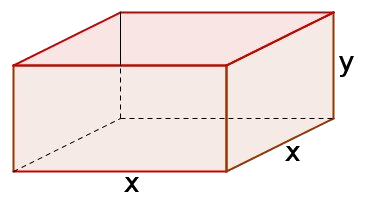

Dentro del mundo de las matemáticas y las ciencias computacionales, se busca resolver un problema de la manera más óptima posible, con algoritmos rápidos y eficientes tal que se utilice la menor cantidad de recursos. De esta convención surgen lo que se conoce como **problemas de optimización**, que consisten en hallar el valor máximo o mínimo de una función dada una variable.



#2. Corte de Varillas

##2.1 Método recursivo



###2.1.1 Código

El siguiente código presenta una solución al problema del corte de varillas, usando el **método recursivo**.

In [70]:
import math
import random

verb = False
contRec = 0
arrCor = []
def corteDeVarillas(p,n, verbose):
  global contRec
  global arrCor
  if(n <= 0):
    if(verbose): 
      print("")
      print("Varilla de largo 0, valor máximo es 0")
      print("")
    return 0 #Caso base
  
  valor_max = -99999999999 #Valor que almacenará ganancia máxima.

  for i in range(0,n):
    contRec+=1
    q = precios[i] + corteDeVarillas(p,n-i-1,verbose)
    if(verbose): print(f"i = {i}")
    if(verbose): print(f"n actual: {n}")
    if(verbose): print(f"n para la recursión siguiente: {n-i-1}")
    if(valor_max < q):
      valor_max = q
      if(i != 0):
        arrCor.append(i)
    if(verbose): print(f"Valor máximo actual = {valor_max}")
  
  if(verbose): 
    print("") 
    print(f"Valor máximo final para esta recursión es {valor_max}") #Valor máximo final de la recursión.
    print("")
  return valor_max

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

#Ejemplo
n = 10
precios = cutrod_instance_generator(10)

print(f"Largo = {n}")
print("Precios por largo: ")

for i in range(0,10):
  print(f"{i+1} = {precios[i]} ")

valorMaximo = corteDeVarillas(precios,n, verb)

print(f"La ganancia máxima posible es {valorMaximo}.")
print(f"Recursiones totales realizadas: {contRec}")
print(f"Cortes totales realizados: {arrCor}")






Largo = 10
Precios por largo: 
1 = 0 
2 = 6 
3 = 12 
4 = 17 
5 = 19 
6 = 20 
7 = 29 
8 = 34 
9 = 38 
10 = 45 
La ganancia máxima posible es 45.
Recursiones totales realizadas: 1023
Cortes totales realizados: [1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 2, 1, 2, 1, 3, 3, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 2, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 2, 1, 3, 1, 2, 1, 8, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 2, 1, 2, 1, 3, 3, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 1, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1,

###2.1.2 Descripción del algoritmo

El algoritmo recibe como entrada un vector de precios `p` por medida y el largo `n` de una varilla en cuestión.

1. Si el valor `n` de entrada es menor o igual a 0, significa que ya no me queda longitud de la varilla con la cual trabajar y, por ende, se retorna 0 como ganancia máxima.

2. Por cada llamada recursiva, se tiene que el valor máximo inicial `valor_max = 0` y se recorre el vector de precios con el índice `i` desde 0 a `n`. Teniendo en cuenta el valor fijo `precios[i]`, se realiza una llamada a la propia función con el nuevo valor de `n = n-i-1`, siendo el largo sobrante de la varilla. Con todo esto en cuenta, `valor_max` tomará el número mayor entre su propio valor y la suma de `precios[i]` con lo que retorna el llamado recursivo a `corteDeVarillas`.

3. Finalmente, se retorna el valor final de `valor_max` conseguido.

n  será el tamaño del problema en cuestión.

Cuando la variable `verbose` es True, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.

###2.1.3 Ejemplo

Considere una varilla de largo $n = 3$, cuyo vector de precios por medida es:

$ p = [5, 9, 13]$

En primer lugar, definimos un valor máximo inicial, el cual será 0.

$valorMax = 0$

Luego, recorremos el vector de precios desde 0 hasta `n` y primero comparamos el valor máximo actual con la suma entre el precio de  que retorna la función $corteDeVarillas$, con $n = n-i-1$.

$i = 0$

$valorMax = max(valorMax , 5 + corteDeVarillas(p , 2)$ (0)

Para el llamado recursivo anteriormente mencionado, se realiza el mismo procedimiento descrito en el párrafo anterior, quedando en este caso $n = n-i-1$. Esto se repite para cada llamada recursiva con $n > 0$

**Recursión siguiente:**

$valorMax = 0$

$i = 0$

$valorMax = max(valorMax , 5 + corteDeVarillas(p , 1)$ 

**Recursión siguiente:**

$valorMax = 0$

$i = 0$

$n = n-i-1 = 0$

$valorMax = max(valorMax , 5 + corteDeVarillas(p , 0)$ 

Para el siguiente llamado recursivo y al ser $n$ igual a 0, se entiende que ya no queda longitud sobrante de la varilla con la cual trabajar, por lo que se retorna 0 como valor máximo.

$valorMax = 0$ (3)

Ahora que tenemos un valor retornado por la función, podemos trabajar con su **llamada recursiva anterior:**

$i = 0$

$valorMax = max(valorMax , 5 + 0)  -> valorMax = 5$ 

El procedimiento se repite hasta lle
**Recursión anterior:**

$valorMax = 0$

$i = 0$

$valorMax = max(valorMax , 5 + 5)  -> valorMax = 10$ 

$i = 1$


$valorMax = max(valorMax , 9 + corteDeVarillas(p , 0) (0))  -> valorMax = 10$

**Recursión anterior:**

$i = 0$

$valorMax = max(valorMax , 5 + 10)  -> valorMax = 15$

$i = 1$

$valorMax = max(valorMax , 9 + corteDeVarillas(p , 1) (5) )  -> valorMax = 15$

$i = 1$

$valorMax = max(valorMax , 13 + corteDeVarillas(p , 0) (0) )  -> valorMax = 15$


Finalmente, tenemos nuestro valor máximo final, que es 15.









###2.1.4 Ejecución del programa paso a paso.

Usando la opción `verbose = True`, se puede apreciar qué ocurre durante el proceso del algoritmo y sus llamadas recursivas. Con propósito de probar distintos casos, se utilizará una varilla de largo 5, cuyo listado de precios por medida de corte son generados al azar.

In [71]:
#Ejemplo
verb = True
n = 5
precios = cutrod_instance_generator(5)

print(f"Largo = {n}")
print("Precios por largo: ")
print("")

for i in range(0,5):
  print(f"{i+1} = {precios[i]} ")

valorMaximo = corteDeVarillas(precios,n, verb)

print(f"La ganancia máxima posible es {valorMaximo}.")

Largo = 5
Precios por largo: 

1 = 8 
2 = 15 
3 = 16 
4 = 20 
5 = 21 

Varilla de largo 0, valor máximo es 0

i = 0
n actual: 1
n para la recursión siguiente: 0
Valor máximo actual = 8

Valor máximo final para esta recursión es 8

i = 0
n actual: 2
n para la recursión siguiente: 1
Valor máximo actual = 16

Varilla de largo 0, valor máximo es 0

i = 1
n actual: 2
n para la recursión siguiente: 0
Valor máximo actual = 16

Valor máximo final para esta recursión es 16

i = 0
n actual: 3
n para la recursión siguiente: 2
Valor máximo actual = 24

Varilla de largo 0, valor máximo es 0

i = 0
n actual: 1
n para la recursión siguiente: 0
Valor máximo actual = 8

Valor máximo final para esta recursión es 8

i = 1
n actual: 3
n para la recursión siguiente: 1
Valor máximo actual = 24

Varilla de largo 0, valor máximo es 0

i = 2
n actual: 3
n para la recursión siguiente: 0
Valor máximo actual = 24

Valor máximo final para esta recursión es 24

i = 0
n actual: 4
n para la recursión siguiente: 3
Val

##2.2 Programación dinámica (Bottom-Up)


###2.2.1 Código

El siguiente código presenta una solución al problema del corte de varillas, usando el **acercamiento Bottom-Up**. 

In [72]:
verb = False
contSub = 0
#Implementación Bottom-Up
def bottomUpCorteVar(p, n, verbose):
  global contSub
  #Crear arreglo de máximos.
  maxArr = [] 
  #Arreglo que guarda los mejores cortes para la solución.
  cortes = [None]*(n+1) 
  #Marcar el caso base largo = 0.
  maxArr.append(0)

  if(verbose): print(f"Arreglo de máximos: {maxArr}")
  #Resolver los sub-problemas de distintos tamaños en orden Bottom-Up
  for j in range(1, n+1):
    if(verbose):
      print("") 
      print(f"j = {j}")
    #Declarar un valor falso para el máximo de la solución.
    valorMax = 0
    if(verbose): print(f"valorMax se reinicia a 0.")
    #Resolver los sub-problemas del sub-problema en orden Bottom-Up.
    for i in range(1, j+1):
      if(verbose): 
        print(f"i = {i}")
        print("")
        print(f"El valor máximo entre {valorMax}")
      if(valorMax < p[i-1] + maxArr[j-i]):
        valorMax = p[i-1] + maxArr[j-i]
        contSub+=1
        cortes[j] = i
      #Ecuación de definición para conseguir valorMax.
      if(verbose): 
        print(f"y la suma entre {p[i-1]} y {maxArr[j-i]} es {valorMax}")
        print("")
    #Agregar el máximo encontrado en el tamaño actual al arreglo.
    maxArr.append(valorMax)
    if(verbose): print(f"Arreglo de máximos: {maxArr}")
  
  #Retornar el sub-problema correspondiente al problema inicial.
  if(verbose): print(f"El valor del arreglo de máximos en la posición {n} es {maxArr[n]}")
  return maxArr[n], cortes

#Ejemplo
n = 10
precios = cutrod_instance_generator(10)
c = []

print(f"Largo = {n}")
print("Precios por largo: ")
print("")

for i in range(0,10):
  print(f"{i+1} = {precios[i]} ")

valorMaximo, c = bottomUpCorteVar(precios,n,verb)

print(f"La ganancia máxima posible es {valorMaximo}.")
print(f"Cortes realizados: {c[1:n]}")
print(f"Subproblemas solucionados en total: {contSub}")


Largo = 10
Precios por largo: 

1 = 0 
2 = 1 
3 = 9 
4 = 18 
5 = 26 
6 = 34 
7 = 44 
8 = 45 
9 = 55 
10 = 56 
La ganancia máxima posible es 56.
Cortes realizados: [None, 2, 3, 4, 5, 6, 7, 8, 9]
Subproblemas solucionados en total: 17


###2.2.2 Descripción del algoritmo

**Subestructura óptima**

Similar a la implementación anterior del algoritmo, se recibe un arreglo que contiene $i$ precios para cada corte y un tamaño $n$ correspondiente a la varilla que queremos cortar. Como en este caso estamos trabajando bajo el paradigma de la **programación dinámica**, previo a explicar cómo funciona, hay que definir la subestructura óptima de nuestro problema.

Para empezar, podemos descubrir cómo nuestra solución óptima, definida por un retorno máximo $r_n$ puede estar puede estar dado por el precio de la varilla completa o por una subvarilla de precio $p_i$ junto al retorno máximo de la varilla que sobra.

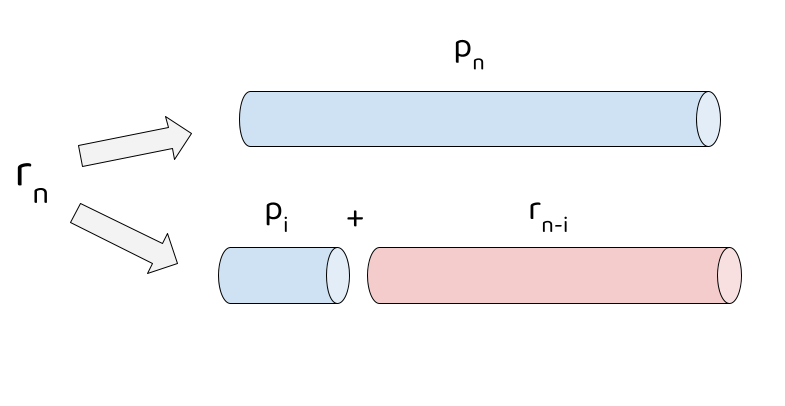

Al ver que este corte es óptimo, cada problema subsiguiente, cada uno idéntico al anterior, se definirá por este valor que nos devolverá la siguiente función recursiva: 

$r_n=\max\limits_{i=1..n}(p_i+r_{n-i})$, donde $n$ es la longitud máxima de la varilla, $p_i$ el valor del corte hallado y $r_{n-i}$ el retorno máximo del valor anterior.

Finalmente, cabe destacar que el **acercamiento Bottom-Up** almacena los subproblemas anteriores para utilizarlos con más facilidad para los casos siguientes, a diferencia de la implementación recursiva en donde un subproblema debía ser resuelto repetidas veces, lo cual conllevaba a que fuera un algoritmo ineficiente.

**Funcionamiento del algoritmo**

El algoritmo recibe como entrada un vector de precios `p` por medida y el largo `n` de una varilla en cuestión.

1. El algoritmo crea un arreglo auxiliar que almacenará los valores máximos de cada sub-problema, y se inicializa el caso base `n = 0` como 0.

2. Por cada valor de `j` desde 1 hasta `n+1` en un ciclo for, se inicializa `valorMax = 0` con el fin de resolver los sub-problemas del problema original en orden Bottom-Up. Dentro de este ciclo y por cada valor de `i` desde 1 hasta `j+1` en otro ciclo for, se busca resolver los sub-problemas del sub-problema. Para ello, `valorMax` toma el valor del número mayor entre ella misma y la suma del vector `p` en la posición `[i-1]` con el arreglo auxiliar en la posición `j-i`.

3. Una vez terminado el ciclo del ciclo, se inserta el valor del máximo final hallado en la iteración dentro del arreglo auxiliar de máximos en la posición `j`.

3. Finalmente, se retorna el valor máximo hallado dentro del arreglo auxiliar en la posición `n`.

$n$ será el tamaño del problema en cuestión.

Cuando la variable `verbose` es True, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.





###2.2.3 Ejemplo

Considere una varilla de largo $n = 3$, cuyo vector de precios por medida es:

$ p = [5, 9, 13]$

Se crea un arreglo auxiliar de máximos y se inicia la primera posición como 0.

$ maxArr = [0 , empty, empty, empty] $

Luego, queremos resolver los subproblemas correspondientes a las casillas vacías de $maxArr$. Para ello, recorremos con un índice `j` que va desde 1 hasta `n`, empezando en la casilla `maxArr[j=1]` e inicializamos nuestro valor máximo como 0 por el momento.

$valorMax = 0$

Luego, para resolver nuestro subproblema debemos resolver sus subproblemas también. Para esto, usamos un índice `i` que irá desde 1 hasta `j`, y por cada una de sus iteraciones, `valorMax` tomará el valor máximo entre su propio dígito y la suma entre `p[i-1]` y `maxArr[j-i]`.

$j = 1$

$i = 1$

$valorMax = max(valorMax, p[0] + maxArr[0])$

Como ya conocemos los valores de estos términos:

$valorMax = max(0, 5 + 0) -> valorMax = 5$

Luego, almacenamos nuestro valor máximo hallado en el arreglo de máximos en la posición `j = 1`.

$ maxArr = [0 , 5, empty, empty] $

Repetimos este mismo proceso para `j = 2`, reinicializando `valorMax`como 0.

$valorMax = 0$

$j = 2$

$i = 1$

$valorMax = max(valorMax, p[0] + maxArr[1]) -> valorMax = 10$ 

Como ya conocemos los valores en cuestión, se tiene que:

$valorMax = max(0, 5 + 5) -> valorMax = 10$ 

Esto se repite para todos los valores de `i` hasta llegar al de `j`.

$i = 2$

$valorMax = max(valorMax, p[1] + maxArr[1])$

$valorMax = max(10, 9 + 0) -> valorMax = 10$ 

Luego, almacenamos nuestro valor máximo hallado en el arreglo de máximos en la posición `j = 2`.

$ maxArr = [0 , 5, 10, empty] $

Repetimos este mismo proceso para `j = 3`, reinicializando nuevamente `valorMax` como 0.

$valorMax = 0$

$j = 3$

$i = 1$

$valorMax = max(valorMax, p[0] + maxArr[2])$

$valorMax = max(0, 5 + 10) -> valorMax = 15$ 

$i = 2$

$valorMax = max(valorMax, p[1] + maxArr[1])$

$valorMax = max(15, 9 + 5) -> valorMax = 15$

$i = 3$

$valorMax = max(valorMax, p[2] + maxArr[0])$

$valorMax = max(15, 13 + 0) -> valorMax = 15$

Luego, almacenamos nuestro valor máximo hallado en el arreglo de máximos en la posición `j = 3`.

$ maxArr = [0 , 5, 10, 15] $

Terminado el ciclo principal, se busca el valor del vector $maxArr$ en la posición `n = 3`, el cual es 15.

Finalmente, tenemos nuestro valor máximo final.



###2.2.4 Ejecución del programa paso a paso.

Usando la opción `verbose = True`, se puede apreciar qué ocurre durante el proceso del algoritmo y sus llamadas recursivas. Con propósito de probar distintos casos, se utilizará una varilla de largo 5, cuyo listado de precios por medida de corte son generados al azar.

In [73]:
#Ejemplo
verb = True
n = 5
precios = cutrod_instance_generator(5)

print(f"Largo = {n}")
print("Precios por largo: ")
print("")

for i in range(0,5):
  print(f"{i+1} = {precios[i]} ")

valorMaximo = bottomUpCorteVar(precios,n, verb)

Largo = 5
Precios por largo: 

1 = 4 
2 = 14 
3 = 23 
4 = 25 
5 = 27 
Arreglo de máximos: [0]

j = 1
valorMax se reinicia a 0.
i = 1

El valor máximo entre 0
y la suma entre 4 y 0 es 4

Arreglo de máximos: [0, 4]

j = 2
valorMax se reinicia a 0.
i = 1

El valor máximo entre 0
y la suma entre 4 y 4 es 8

i = 2

El valor máximo entre 8
y la suma entre 14 y 0 es 14

Arreglo de máximos: [0, 4, 14]

j = 3
valorMax se reinicia a 0.
i = 1

El valor máximo entre 0
y la suma entre 4 y 14 es 18

i = 2

El valor máximo entre 18
y la suma entre 14 y 4 es 18

i = 3

El valor máximo entre 18
y la suma entre 23 y 0 es 23

Arreglo de máximos: [0, 4, 14, 23]

j = 4
valorMax se reinicia a 0.
i = 1

El valor máximo entre 0
y la suma entre 4 y 23 es 27

i = 2

El valor máximo entre 27
y la suma entre 14 y 14 es 28

i = 3

El valor máximo entre 28
y la suma entre 23 y 4 es 28

i = 4

El valor máximo entre 28
y la suma entre 25 y 0 es 28

Arreglo de máximos: [0, 4, 14, 23, 28]

j = 5
valorMax se reinicia a 

#3. Correctitud

##3.1 Teorema (Correctitud de la función CorteDeVarillas con acercamiento Bottom-Up)

*El algoritmo CorteDeVarillas recibe un vector de precios $p = [a_1,a_2,...,a_n]$ y un largo de varilla $n$, retornando el valor máximo $r_n $ de ganancias que se puede obtener de todas las combinaciones de cortes posibles.*

###Prueba del teorema

Aún si esta implementación del algoritmo no es explícitamente recursiva, es posible comprobar si la solución a nuestro problema es correcto a través de la **inducción matemática** gracias a la función recursiva que está dentro de un ciclo iterativo, el cual busca el máximo valor en una $i$-ésima iteración analizando los casos anteriores, que ya son soluciones como tal.

**Hipótesis $P(n)$:** 

> CorteDeVarillas retorna el valor máximo $r_n$ de ganancias que se puede obtener de todas las combinaciones de cortes posibles para una longitud $n$.

**Caso base ($n = 0$):**

Al ver que nuestra varilla posee un largo 0, esto quiere decir que se tiene el máximo de ganancias para este caso, ya que siempre será el mismo, por ende se retorna este valor, de forma que $P(0)$ se cumple. Esto es trivialmente cierto.

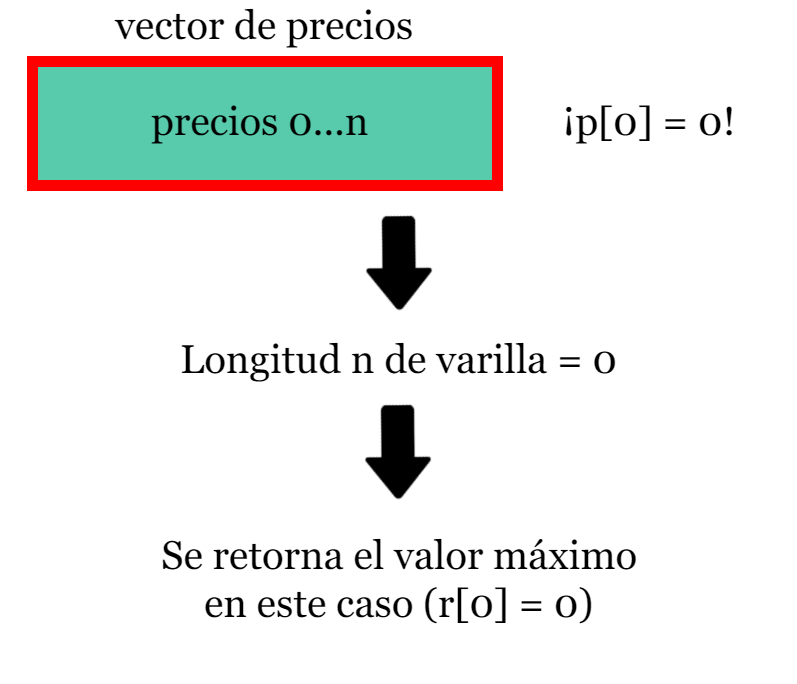

**Caso inductivo ($m < n$):**

Tras comprobar que el caso base sí cumple nuestra hipótesis, ahora comprobamos aquellos casos donde se hace uso de soluciones anteriores. Dentro del algoritmo podemos observar como éste puede funcionar de dos formas dependiendo de la condicional.

Tenemos $r[n] = max(p[n], p[i] + r[n-i]$, del cual pueden surgir dos casos.
1. Si $p[n] < p[i] + r[n-i]$, el subproblema $r[n-i]$ ya fue resultado anteriormente en iteraciones previas, por lo que se retorna el máximo beneficio.
2. Si $p[n] > p[i] + r[n-i]$, se retorna el máximo beneficio del precio correspondiente al largo de la varilla completa.

Ya que sabemos que los subproblemas anteriores **siempre serán menores a $n$**, gracias a la inducción matemática podemos afirmar que estos siempre retornarán el valor máximo correcto correspondiente a su posición.

Por tanto, y luego de verificar que ambos casos sí cumplen la hipótesis $P(n)$, es posible afirmar que el algoritmo CorteDeVarillas en su forma de programación dinámica es **correcto**.



#4. Tiempo de ejecución

##4.1 Teorema

El algoritmo `CorteDeVarillas` en su implementación Bottom-Up posee un tiempo de ejecución $O(n^2)$ **en el peor y mejor caso**.

##4.2 Prueba del teorema.

Al analizar detenidamente nuestro código impuesto en el punto `2.1.1`, podemos ver que tenemos un ciclo for con el índice `j` que recorre las posiciones de los subproblemas. Dentro de este, existe otro ciclo for con el índice `i` que recorre todos los subproblemas hasta llegar al subproblema `j` y hallar la solución de este último. Gracias a la estructura de este algoritmo, podemos concluir que su tiempo de ejecución es efectivamente $O(n^2)$.

La cantidad de subproblemas a resolver en función del tamaño del problema de entrada $n$ es dada por la ecuación:

$T(n) = \sum\limits{i=1}^{n}\sum\limits{j=i}^{j} c = \sum\limits_{j=1}^{n} j = c\frac{n(n+1)}{2} = O(n^2)$

Cabe mencionar que para cada subproblema, el tiempo de ejecución es $O(n)$, y la complejidad espacial del algoritmo es $O(n)$. Esto es debido a que se crea un arreglo auxiliar para guardar los valores máximos de cada subproblema.

#5. Experimentos

##5.1 Tiempos de ejecución (Recursivo vs Bottom-Up)

El siguiente gráfico mostrará la comparación de tiempos de ejecución del algoritmo `CorteDeVarillas` en su implementación recursiva frente a la implementación Bottom-Up, en función del tamaño del problema $n$ entre 5 y 20.

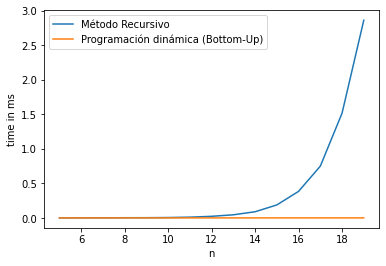

In [74]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

verb = False

x1=[]; x2=[];y1=[]; y2=[]

for n in range(5,20):
  precios = cutrod_instance_generator(n)

  #la función repeat está ejecutando 20 veces corteDeVarillas y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import corteDeVarillas", stmt=f"corteDeVarillas({precios},{n},{verb})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

for n in range(5,20):

  precios = cutrod_instance_generator(n)

  #la función repeat está ejecutando 20 veces bottomUpCorteVar y retorna el mejor tiempo obtenido.
  time = repeat(setup="from __main__ import bottomUpCorteVar", stmt=f"bottomUpCorteVar({precios},{n},{verb})", repeat=1, number=10)

  x2.append(n)
  y2.append(time)


plt.plot(x1,y1)
plt.plot(x2,y2)
plt.legend(["Método Recursivo", "Programación dinámica (Bottom-Up)"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

## Análisis de resultados

A partir de lo visto en la gráfica generada, podemos deducir que la implementación recursiva del algoritmo `CorteDeVarillas` no es muy eficiente cuando se tratan tamaños de entrada $n$ muy grandes, por tener que solucionar potencialmente un mismo subproblema repetidas veces. 

Por otro lado, cabe notar que la implementación Bottom-Up se mantiene en tiempos de ejecución muy bajos, principalmente debido a que almacena los valores máximos de los subproblemas a medida que se resuelven para volver a utilizarlos. 

##5.2 Cantidad de subproblemas (Bottom-Up)

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente.
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias.

Se tomarán en cuenta tamaños de problemas con $n \in [10,29]$.

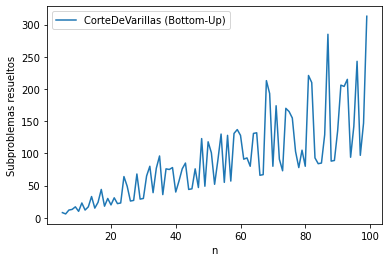

In [77]:
import matplotlib.pyplot as plt
verb = False
x=[n for n in range(5,100)] 
y=[]; 

for n in range(5,100):
  contSub = 0
  c = []
  precios = cutrod_instance_generator(n)
  valorMaximo,c = bottomUpCorteVar(precios,n,verb)
  y.append(contSub)

plt.plot(x,y)
plt.legend(["CorteDeVarillas (Bottom-Up)"])

plt.xlabel('n')
plt.ylabel('Subproblemas resueltos')
plt.show()

## Análisis de resultados

Al ver la gráfica y tal como era de esperarse, las proyecciones del número de subproblemas resueltos en el mejor y peor caso son idénticos entre sí, principalmente porque ambos casos poseen un tiempo de ejecución $O(n^2)$.

Para el caso promedio, podemos destacar que a medida que aumenta el tamaño de $n$, mayor será la cantidad de subproblemas resueltos dentro del algoritmo. Además, se pueden apreciar varios *peaks* de subproblemas a lo largo de la gráfica, probablemente esto se deba a la impredecibilidad de los procesadores o *hardware* que hacen correr el código, además de quizás otros procesos que también lo están ocupando.
